In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1

In [2]:
df = pd.read_csv('data/fatherson.csv', sep='\t')
df.head()

,fheight,sheight
0,165.2,151.8
1,160.7,160.6
2,165.0,160.9
3,167.0,159.5
4,155.3,163.3


In [3]:
df.shape

(1078, 2)

In [4]:
df.isnull().sum()

fheight    0
sheight    0
dtype: int64

1078 entries and 2 columns, there is no missing data

In [5]:
#father descriptive statistics
f_mean = df.fheight.mean()
print(f_mean)
f_std = df.fheight.std()
print(f_std)
f_med = df.fheight.median()
print(f_med)
f_max = df.fheight.max()
f_min = df.fheight.min()
print("Range is " + str(f_min) + " - " + str(f_max))

171.92523191094622
6.972345805242013
172.1
Range is 149.9 - 191.6


In [6]:
#son descriptive statistics
s_mean = df.sheight.mean()
print(s_mean)
s_std = df.sheight.std()
print(s_std)
s_med = df.sheight.median()
print(s_med)
s_max = df.sheight.max()
s_min = df.sheight.min()
print("Range is " + str(s_min) + " - " + str(s_max))

174.45723562152145
7.150713294127493
174.3
Range is 148.6 - 199.0


In [38]:
real_diff = abs(f_mean - s_mean)
real_diff

2.532003710575225

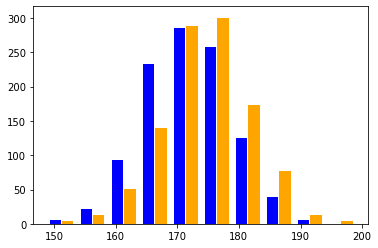

In [8]:
_ = plt.hist([df.fheight,df.sheight] , edgecolor='w', color=['blue', 'orange'])

According to this plot the son's heights (shown in orange) is taller since there are more tallers sons in the the larger heights. As the height decreases there are more fathers than sons. This follows a normal distribution.

H0: Fathers and Son's are of similar heights

In [9]:
mean = df.mean().mean()
mean

173.19123376623384

In [10]:
std = pd.np.r_[df.loc[:,'fheight'].values, df.loc[:,'sheight'].values].std()
std

/Users/ally/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


7.171446820428152

In [11]:
fake_fathers = np.random.normal(mean, std, 10)
fake_sons = np.random.normal(mean, std, 10)
np.mean(fake_fathers) - np.mean(fake_sons)

2.745605199486903

In [12]:
fake_fathers = np.random.normal(mean, std, 1000)
fake_sons = np.random.normal(mean, std, 1000)
np.mean(fake_fathers) - np.mean(fake_sons)

0.13997915621970947

In [13]:
diff = np.empty(1000)
for i in range(1000):
    fake_fathers = np.random.normal(mean, std, 10)
    fake_sons = np.random.normal(mean, std, 10)
    diff[i] = np.mean(fake_fathers) - np.mean(fake_sons)

In [14]:
diff.mean()

-0.07694920754108651

In [15]:
np.abs(diff).max()

10.91359727787318

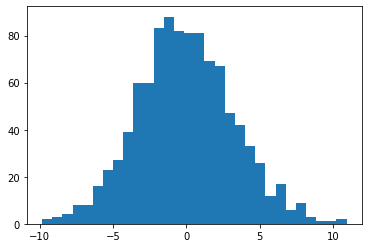

In [16]:
_ = plt.hist(diff, bins=30)

In [17]:
np.percentile(diff, [2.5, 97.5])

array([-6.37297536,  6.48024014])

Actual Difference 2.53

The actual difference is within the range shown above so this is a fluke.

# 2

In [33]:
#standard error
sigma = np.sqrt(np.var(df.fheight)/1078 + np.var(df.sheight)/1078)
sigma

0.30404474575682616

In [34]:
# one degree of freedom & alpha = 0.05
t_value = 12.71

In [35]:
(mean - t_value * sigma, mean + t_value * sigma)

(169.32682504766458, 177.0556424848031)

With a confidence level of 95%, we can accept the null hypothesis and say that fathers and sons are an equal height.

In [39]:
t = real_diff / sigma
t

8.327733815207292

The likelihood of this t-value happening is quite low because as the t values get larger they become more spaced out.

In conclusion, to a degree of 95% confidence we can say that fathers and sons are the same height.